# exploration.py
This notebook demonstrates the available functions of `exploration.py`.\
For detailed documentation of each function's arguments, please have a look into the script itself.\
The following packages should be installed:
* pandas
* numpy
* matplotlib

Import necessary external packages and tweak some setting for displaying the data.

In [1]:
import pandas as pd
import scipy.stats as stats
import numpy.random as rnd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

from IPython.display import Markdown, display
def printmd(text):
    display(Markdown(text))

Import the utility class from [experiment-evaluation](https://github.com/MarcRuble/experiment-evaluation).\
*Note: The file `exploration.py` needs to be in the same folder as this notebook.*

In [2]:
from exploration import DatasetExploration

## Loading and Setup
`DatasetExploration` objects can be created from any pandas dataframe which can be read, e.g., from a file.

In [3]:
df = pd.read_csv("tables/results.csv")
expl = DatasetExploration(df)

## Display
The encapsulated data can be displayed either plain or in a sorted fashion.

In [4]:
expl.display()
expl.display_sorted('Task')
expl.display_sorted('Q4', ascending=False)

,Participant,Task,Condition,Q1,Q2,Q3,Q4
0,3,1,4,7,5,6,1
1,4,2,2,7,3,7,1
2,1,2,1,3,3,4,6
3,3,2,2,4,5,3,6
4,9,1,2,6,7,6,1
5,3,2,3,7,1,7,3
6,6,1,1,7,3,2,5
7,3,1,1,7,3,4,4
8,13,2,3,4,4,1,4
9,1,1,1,2,2,4,3


,Participant,Task,Condition,Q1,Q2,Q3,Q4
0,3,1,4,7,5,6,1
135,3,1,1,7,5,7,6
134,3,1,3,7,3,6,2
131,4,1,2,6,1,5,7
129,7,1,4,7,7,5,1
128,9,1,2,2,3,3,3
127,1,1,3,4,2,5,4
124,10,1,1,1,1,5,4
121,12,1,3,1,7,2,5
120,8,1,3,4,4,4,1


,Participant,Task,Condition,Q1,Q2,Q3,Q4
39,8,2,1,5,3,7,7
180,5,2,3,4,5,3,7
34,1,2,2,4,4,5,7
153,2,1,2,1,2,6,7
188,8,1,2,7,5,2,7
31,10,2,4,7,1,1,7
82,12,2,3,7,4,5,7
167,12,1,1,1,3,3,7
53,14,1,3,5,1,2,7
25,4,1,3,1,5,7,7


## Manipulations
A couple of functions allow to modify the data before further exploration.

#### Exclude
Excludes all data rows which fulfill a given condition where the condition is given as a tuple of form `(column name, value)`.\
Can be used, e.g., for excluding the results of certain participants from further exploration.

In [5]:
expl.exclude(('Participant', 3))
expl.display()

,Participant,Task,Condition,Q1,Q2,Q3,Q4
1,4,2,2,7,3,7,1
2,1,2,1,3,3,4,6
4,9,1,2,6,7,6,1
6,6,1,1,7,3,2,5
8,13,2,3,4,4,1,4
9,1,1,1,2,2,4,3
10,7,1,1,2,1,1,4
11,6,2,4,1,1,1,1
12,1,1,3,1,7,3,2
13,12,2,4,4,2,5,1


#### Replace
Allow to replace the values in a column by other values. Mapping from old value to new value is done via a dictionary.\
This is helpful for renaming the values.

In [6]:
expl.replace('Condition', { 1: 'A', 2: 'B', 3: 'C', 4: 'D' })
expl.display()

,Participant,Task,Condition,Q1,Q2,Q3,Q4
1,4,2,B,7,3,7,1
2,1,2,A,3,3,4,6
4,9,1,B,6,7,6,1
6,6,1,A,7,3,2,5
8,13,2,C,4,4,1,4
9,1,1,A,2,2,4,3
10,7,1,A,2,1,1,4
11,6,2,D,1,1,1,1
12,1,1,C,1,7,3,2
13,12,2,D,4,2,5,1


#### Add Mean
This function allows to add a further column to your data which is always the mean of some other columns given by you.\
This is useful when several measurements are combined to a single score.

In [7]:
expl.add_mean(['Q1', 'Q2', 'Q3', 'Q4'], 'Score')
expl.display()

,Participant,Task,Condition,Q1,Q2,Q3,Q4,Score
1,4,2,B,7,3,7,1,4.50
2,1,2,A,3,3,4,6,4.00
4,9,1,B,6,7,6,1,5.00
6,6,1,A,7,3,2,5,4.25
8,13,2,C,4,4,1,4,3.25
9,1,1,A,2,2,4,3,2.75
10,7,1,A,2,1,1,4,2.00
11,6,2,D,1,1,1,1,1.00
12,1,1,C,1,7,3,2,3.25
13,12,2,D,4,2,5,1,3.00


## Configurations
A `DatasetExploration` object offers some configurations to be saved in order to prevent having to give the same arguments to every function.

#### Save Order
This function saves the order in which values of a given column are always ordered, e.g. when doing a plot.

In [8]:
expl.save_order('Condition', ['A', 'B', 'C', 'D'])

#### Save Color
Similar to the previous, this function saves the color representing each value of a given column, e.g. for doing a plot.\
When called without a column, it saves a default order of colors for columns which have not been defined individually.

In [9]:
expl.save_colors(['limegreen', 'turquoise', 'dodgerblue', 'purple'], column='Condition')
expl.save_colors(['red', 'darkorange', 'gold'])

## Quick Statistics
`DatasetExploration` also offers functions for simple statistics.

#### Mean and Standard Deviations
These measures can be found for any given column.

In [10]:
display(expl.mean('Score'))
display(expl.std('Score'))

3.9057142857142857

1.0513245223200718

#### Counts by Property
This feature returns for a given column the distribution of values in this column.\
It needs an index column which corresponds to the subjects you want to count.\
In this example, we count how many participants experienced each condition.

In [11]:
display(expl.counts_by_property('Condition', 'Participant'))

Condition
A    40
B    41
C    46
D    48
Name: Participant, dtype: int64

## Plots
Now to the interesting part: The core feature of `DatasetExploration` is in simple plots.

### Barplot
A barplot is the simplest kind of plot and shows an aggregation of the values along the y-axis between several categories.\
In the example, we want to compare the different conditions regarding the resulting score.\
This needs no more than one line of code.

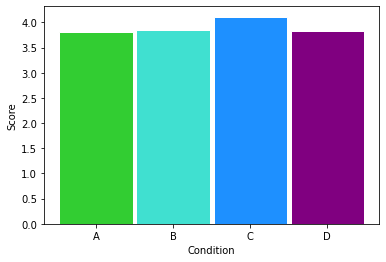

In [12]:
expl.barplot('Condition', 'Score')

This one used the mean as standard way of aggregation. But we plot arbitrary functions like the standard deviations.

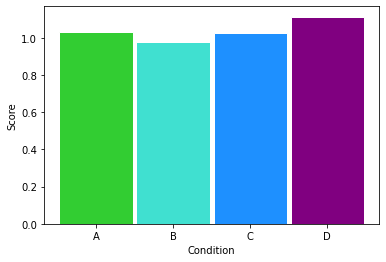

In [13]:
expl.barplot('Condition', 'Score', func=np.std)

Also we can use a condition to filter out only a part of the data to plot.\
E.g. we only explore the scores from task 1.

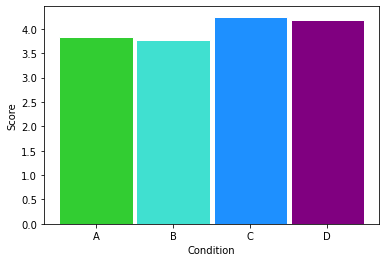

In [14]:
expl.barplot('Condition', 'Score', condition=('Task', 1))

Or investigate how participant 4 performed in task 2.

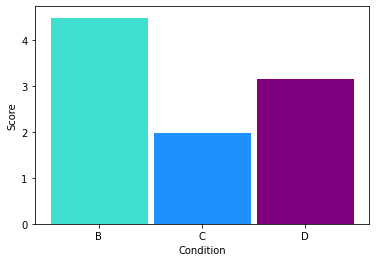

In [15]:
expl.barplot('Condition', 'Score', condition=[('Task', 2), ('Participant', 4)])

#### Multiple y-variables
In the previous examples, only 1 y-variable was used, our score column. But to compare multiple columns, one can also give an array of column names and thereby inspect the individual values instead of the aggregated score.\
You can choose the hatches of the resulting bars by giving an array of symbols (see https://matplotlib.org/devdocs/gallery/shapes_and_collections/hatch_style_reference.html for reference on these symbols).

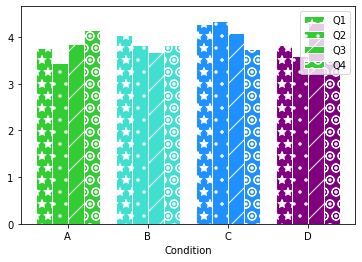

In [16]:
expl.barplot('Condition', ['Q1', 'Q2', 'Q3', 'Q4'], hatches=['*', '.', '/', 'O.'])

The label of the x-axis and the legend and label of the y-axis can also be given explicitly. This also allows to have both a legend and a label for the y-axes components.
When using multiple y-values it can also be helpful to explicitly set the bar width as desired.

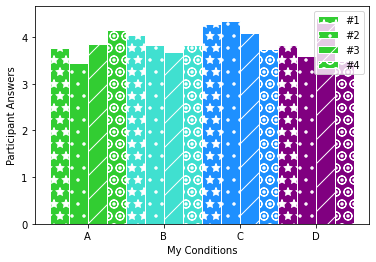

In [17]:
expl.barplot('Condition', ['Q1', 'Q2', 'Q3', 'Q4'], hatches=['*', '.', '/', 'O.'], x_label='My Conditions', 
             y_legend=['#1', '#2', '#3', '#4'], y_label='Participant Answers', bar_width=0.25)

#### Saving to a file
To save the resulting plot to a file, simply give the function a file name to save to.\
For presenting the plot on top of arbitrary backgrounds, you can adjust the color of the axes and labels.

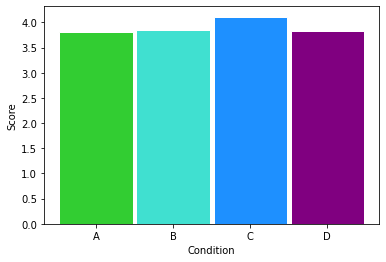

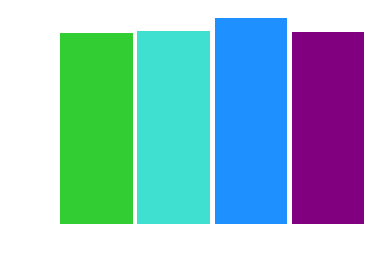

In [18]:
expl.barplot('Condition', 'Score', file='my_barplot_black.png')
expl.barplot('Condition', 'Score', axes_color='white', file='my_barplot_white.png')

### Boxplots
[Box-Whisker plots](https://en.wikipedia.org/wiki/Box_plot) provide a lot more information about data distribution than a boxplot but creating them using `DatasetExploration` is very similar. The function `boxplot` takes the exact same arguments like `barplot` except for the aggregation function which is not needed for boxplots because the data is displayed as a distribution instead of a single value.

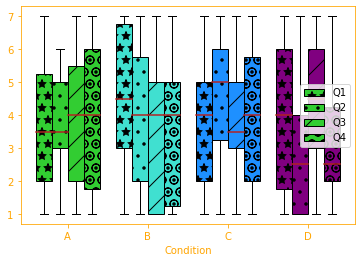

In [19]:
expl.boxplot('Condition', ['Q1', 'Q2', 'Q3', 'Q4'], hatches=['*', '.', '/', 'O.'], condition=('Task', 2),
             axes_color='orange', file='my_boxplot_orange.png')

### "Both"plots
... are a new invention and will simply plot the barplot and boxplot with same arguments right next to each other. This can be useful in gathering first trends in the data as the barplots are good for a quick glance and boxplots provide further information.

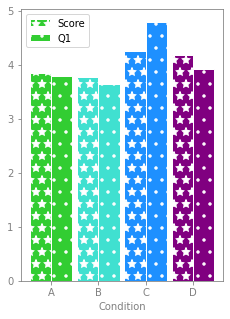

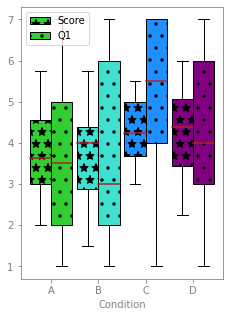

In [20]:
expl.bothplot('Condition', ['Score', 'Q1'], hatches=['*', '.'], condition=('Task', 1),
             axes_color='grey', file='my_bothplot_grey.png')